<div style="background-color: teal; padding: 10px;">
    <h3 style="color: white;">Ultimate Data Challenge</h3>
</div>

---

#### Problem Statement

Ultimate is interested in predicting rider retention. To help explore this question, we have
provided a sample dataset of a cohort of users who signed up for an Ultimate account in
January 2014. 

The data was pulled several months later; we consider a user retained if they
took a trip over the "preceding" 30 days.

Help our stakeholders understand what factors are the best predictors
for retention, and offer suggestions to operationalize those insights to help Ultimate

**Rubric**

1. Perform any cleaning, exploratory analysis, and/or visualizations to use the provided
data for this analysis (a few sentences/plots describing your approach will suffice). What
fraction of the observed users was retained?

2. Build a predictive model to help Ultimate determine whether or not a user will be active in
their 6th month on the system. Discuss why you chose your approach, what alternatives
you considered, and any concerns you have. How valid is your model? Include any key
indicators of model performance.

3. Briefly discuss how Ultimate might leverage the insights gained from the model to
improve its long-term rider retention (again, a few sentences will suffice)


<br/>

---

#### Approach

There are three notebooks in this solution, as well as two python files containing supporting functions

<font color=teal>ultimate_03.01.ipynb -- Feature Selection</font>

Clean and transform the data

- add a binary retained column containing users who have had trips in the 30 days ending on 7/2014

- add a column for the amount of time between each user's signup date and their last trip date

Feature reduction is not really necessary with this dataset

Perform feature selection in the following ways:

- measure correlation between all columns
- measure the top features that have correlation to the retained label
- Use XGBoost to measure feature importance 

Only one or two the calculated features get a high score, and those don't make any obvious sense.  The rest do not get high scores, but it may be that a ML solution can pull out some meaning from the combination of features.  I think it would be a good plan to use deep learning for that sort of task.

It appears that the best features are:

- the month that the user took their last trip.  This is a calculated column using the last_trip_date, and it makes no sense, and initially I removed it, but in retrospect, maybe that's something that a domain expert (or the person who created this assignment) might understand.  

- The length of time the user has been a user.  This is a calculated column measuring the amount of time between signup and the user's last trip.  It may seem like the very definition of 'retained,' but our actual definition for this project is whether the user has taken a trip over the last thirty days.  These are mechanically different.

- Some weak runner ups are: The city of Kings Landing, the average rating by driver, whether the user provided any mobile phone info, and ultimate black user are next-best, but they get low scores and are questionable predictors


<br/>


<font color=teal>ultimate_03.02.ipynb -- Featuretools experiment</font>

Use feature tools to understand what features it would create.   Features tools created aggregations of the original data that I don't think make sense in this case.  And feature tools also included variations on the 'retained' label, which I would remove.

<br/>


<font color=teal>ultimate_03.03.ipynb—Neural Network AN model</font>

Perform a deep learning experiment using all the features, included those I calculated: **f1-score: .94**

According to the problem statement, we are trying to predict the 'future' which sounds like a big hint that this is a time series problem, but I did not see that the 

Because there's little correlation between retention and most of the features, I think it would be more tenuous to get to a prediction using a linear or ARIMA model.
We experimented with gradient boosting during feature selection, and it scored high only on our calculated feature-the single days between signup. 
A deep learning model is sometimes able to combine and make some sense out of seemingly non-linear relationships—and I think that's the best approach for the predictive model

but I think starting with an LSTM or transformer network would be overkill for this data-it's difficult to think about how one would structure the input given the data we have 


<br/>

<br/>


<br/>


---



#### Conclusion

Perform any cleaning, exploratory analysis, and/or visualizations to use the provided
data for this analysis (a few sentences/plots describing your approach will suffice). What
fraction of the observed users was retained?

<font color=teal>See the approach description above and this notebook for specifics.   Using the maximun last_trip_date in the dataset as the 'last' day and counting 30 days back, the retained percentage is 37%</font>

<br/>

Build a predictive model to help Ultimate determine whether or not a user will be active in
their 6th month on the system. Discuss why you chose your approach, what alternatives
you considered, and any concerns you have. How valid is your model? Include any key
indicators of model performance.

<font color=teal>Although the 'Rubric' might be hinting at a time-series problem, I did not feel I think starting with an ARIMA, LSTM or transformer network would work for this data-it's difficult to think about how one would meaningfully structure the input given the data we have
It would be worth discussion.  I could be missing something
</font> 

<font color=teal>I experimented with gradient boosting during feature selection, and it scored high only on our calculated feature-the single days between signup.  I felt that it was telling us that it did not have much to work with</font>

<font color=teal>A deep learning model is sometimes able to combine and make some sense out of seemingly non-linear relationships—and I think that's the best approach for the predictive model. 
I used a simple ANN model.</font>

<font color=teal>The F1 score using both the original features provided, and the features I calculated yielded an f1 score of 0.988 (without the last_trip_month feature we got .94)</font>

<font color=teal>Without the additional feature (just using the features provided) yielded an f1 score of 0.57</font>

<font color=teal>One issue worth mentioning is that the calculated 'retained' label is a little unbalanced.  Only 37% of the users are retained.   
I did not feel that bootstrapping data would increase either f1 score significantly.  But if we were going to deploy the model, I would probably spend the additional time and try to balance the data</font>


<br/>



Briefly discuss how Ultimate might leverage the insights gained from the model to
improve its long-term rider retention (again, a few sentences will suffice)

<font color=teal>First, this is a 'toy' assignment, so it's hard to know how realistic the outcome is, or should be. It's completely possible that the data is engineered for a specific solution whether it makes logic sense or not. 
Another possibility is that I'm just missing something that would make sense
</font>

<font color=teal>As obvious as it sounds, users who have been active for several months are more likely to stay active and be retained.  The only simple target we might have is to keep users who are already active...happpy..</font>

<font color=teal>I did not see that any of the other features have a clear linear relationship to retention that could be actioned, for example, by a marketing team. 
We might be able to say that people who took their last trip in July had a higher retention, but it would be tenuous to say that any of these individual features are worth spending effort on without discussing with a domain expert
</font>

<font color=teal>While we had good success with a simple ANN deep learning model, it is a complex black-box prediction that defies logic.  
Without discussing further with a domain expert, you can't really take lessons from it that a layperson could 'action' on.  
It may be that it can only be used as a black-box that seems to predict with accuracy</font>



---

<div style="background-color: teal; padding: 10px;">
    <h3 style="color: white;">03.01 -- Feature Selection</h3>
</div>

Setup, input and inspect the data

In [39]:
from ultimate_utils import read_ultimate_data, add_retained_label,perform_data_transforms
from ultimate_utils import encode_ultimate_features
from ultimate_utils import plot_heatmap
from ultimate_utils import correlate_to_target, plot_correlations
from ultimate_utils import calc_feature_importance

from tqdm.autonotebook import tqdm
import warnings

# Suppress all warnings
warnings.filterwarnings("ignore")

<div style="background-color: teal; padding: 10px;">
    <h3 style="color: white;">Read and review data</h3>
</div>

- 50,000 rows
- Signups range from 1/1/2014 to 1/31/2014—a single month
- Last trip dates range from 1/3/2014 to 7/1/2014
- 

In [40]:
df = read_ultimate_data()


In [60]:
df.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,retained,signup_month,last_trip_month,last_trip_days_since_su
0,king's_landing,4.0,2014-01-25,4.7,1.10,2014-06-17,iphone,15.4,1,46.2,3.67,5.0,1,1,6,143
1,astapor,0.0,2014-01-29,5.0,1.00,2014-05-05,android,0.0,0,50.0,8.26,5.0,0,1,5,96
2,astapor,3.0,2014-01-06,4.3,1.00,2014-01-07,iphone,0.0,0,100.0,0.77,5.0,0,1,1,1
3,king's_landing,9.0,2014-01-10,4.6,1.14,2014-06-29,iphone,20.0,1,80.0,2.36,4.9,1,1,6,170
4,winterfell,14.0,2014-01-27,4.4,1.19,2014-03-15,android,11.8,0,82.4,3.13,4.9,0,1,3,47


In [61]:
df.dtypes

city                             category
trips_in_first_30_days            float64
signup_date                datetime64[ns]
avg_rating_of_driver              float64
avg_surge                         float64
last_trip_date             datetime64[ns]
phone                            category
surge_pct                         float64
ultimate_black_user                 int64
weekday_pct                       float64
avg_dist                          float64
avg_rating_by_driver              float64
retained                            int64
signup_month                     category
last_trip_month                  category
last_trip_days_since_su             int64
dtype: object

50,000 rows and 11 columns

In [43]:
df.shape

(50000, 12)

It Contains one month of data from 2014-01-01 to 2014-01-31

In [62]:
df.agg(
    {'signup_date': ['min', 'max'], 'last_trip_date': ['min', 'max']}
).reset_index()

,index,signup_date,last_trip_date
0,min,2014-01-01,2014-01-01
1,max,2014-01-31,2014-07-01


16% of avg_rating_of_drive (8122 records) are null
0.4 % of avg_rating_by_drive (201 records) are null


In [63]:
df.isna().sum().sort_values(ascending=False)

city                       0
trips_in_first_30_days     0
signup_date                0
avg_rating_of_driver       0
avg_surge                  0
last_trip_date             0
phone                      0
surge_pct                  0
ultimate_black_user        0
weekday_pct                0
avg_dist                   0
avg_rating_by_driver       0
retained                   0
signup_month               0
last_trip_month            0
last_trip_days_since_su    0
dtype: int64

<div style="background-color: teal; padding: 10px;">
    <h3 style="color: white;">Transforms</h3>
</div>


Fill nulls, convert dtypes, conform data, and add additional features


#### Categorize users as either retained or not 

The definition of a retained user is one who has taken a trip over the "last" thirty days.   But no end data is provided. 
The logic I'll use here is to assume that the oldest trip date in the entire dataset max(last_trip_date) is close to the end date when the dataset was created

It looks like the retained percentage as of July 2014 is 36%


In [46]:
add_retained_label(df)


In [47]:
# get the retained valuue counts
retained = df.retained.value_counts()
retained_count =  retained[1]

# get the percentage of retained users as of 7/2014
retained_count / df.shape[0]

0.3662


#### Prepare data for ML

**Scale and maybe normalize**
avg_rating_by_driver: float : 28 numeric values for avg_rating_by_driver - could be a category or a numeric. - fillna with ... average over population
avg_rating_of_driver: float :Avg driver rating has 38 fields - category?  fillna with ... average over population
avg_surge: float : surge 115 values - leave as a numeric
surge_pct:  % 367 values - leave as a numeric
avg_dist: float : numeric
weekday_pct: float :  numeric 

**Categorize encoding**
phone: Although there are 396 records with no phone value=- fill with 'Other'
city:  object - Only three cities and no nulls, so that can be categorized
trips_in_first_30_days: this is essentially continuous numeric but there are only 9 unique values -- can also be one-hot encoded ... if we want to

**Conform Dtypes**
Cast numerics, booleans, and categories appropriately

**Add new features**
Add last_trip_days_since_su—This is the duration of time from the signup_date to the last_trip date

In [64]:
perform_data_transforms(df)
df.dtypes

city                             category
trips_in_first_30_days            float64
signup_date                datetime64[ns]
avg_rating_of_driver              float64
avg_surge                         float64
last_trip_date             datetime64[ns]
phone                            category
surge_pct                         float64
ultimate_black_user                 int64
weekday_pct                       float64
avg_dist                          float64
avg_rating_by_driver              float64
retained                            int64
signup_month                     category
last_trip_month                  category
last_trip_days_since_su             int64
dtype: object

Encode the data for machine learning

- Scale the numeric columns
- One-hot encode categorical columns

In [65]:

df_encoded = encode_ultimate_features(df)
df_encoded.head()


,trips_in_first_30_days,avg_rating_of_driver,avg_surge,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,retained,last_trip_days_since_su,...,city_king's_landing,city_winterfell,signup_month_1,last_trip_month_1,last_trip_month_2,last_trip_month_3,last_trip_month_4,last_trip_month_5,last_trip_month_6,last_trip_month_7
0,0.453984,0.174240,0.113506,0.328202,1,-0.397131,-0.372650,0.497684,1,0.808153,...,1,0,1,0,0,0,0,0,1,0
1,-0.600689,0.705241,-0.336268,-0.443394,0,-0.294653,0.431583,0.497684,0,0.051665,...,0,0,1,0,0,0,0,1,0,0
2,0.190316,-0.533761,-0.336268,-0.443394,0,1.053741,-0.880771,0.497684,0,-1.477407,...,0,0,1,1,0,0,0,0,0,0
3,1.772325,-0.002760,0.293416,0.558679,1,0.514383,-0.602181,0.273342,1,1.242731,...,1,0,1,0,0,0,0,0,1,0
4,3.090665,-0.356760,0.518303,0.147829,0,0.579106,-0.467266,0.273342,0,-0.737014,...,0,1,1,0,0,1,0,0,0,0


Perform any final validations

In [66]:
assert df.isna().sum().sum() == 0

<div style="background-color: teal; padding: 10px;">
    <h3 style="color: white;">Evaluate features</h3>
</div>


#### Perform Correlation

First, let's see how a correlation map looks.
Well...it does not look great.   The only colum with any reasonable correlation to the "retained" label is the one we created <font color=orange>last_trip_days_since_su</font>
What are we missing?

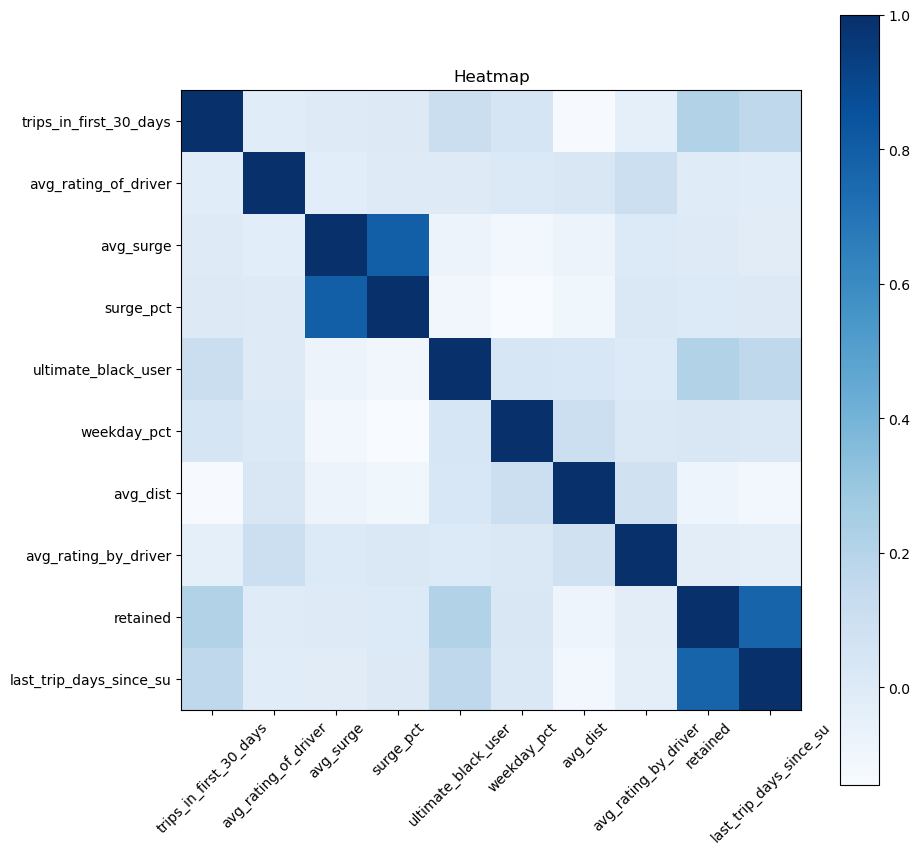

In [51]:
# Call the function with your desired x label font size
plot_heatmap(df, cmap='Blues', label_fontsize=10)  # Adjust the fontsize as needed

#### How do we correlate just to the 'retained' label?

Using the same correlation calculation as above, rank features by how closely they correlate to our "retained" label


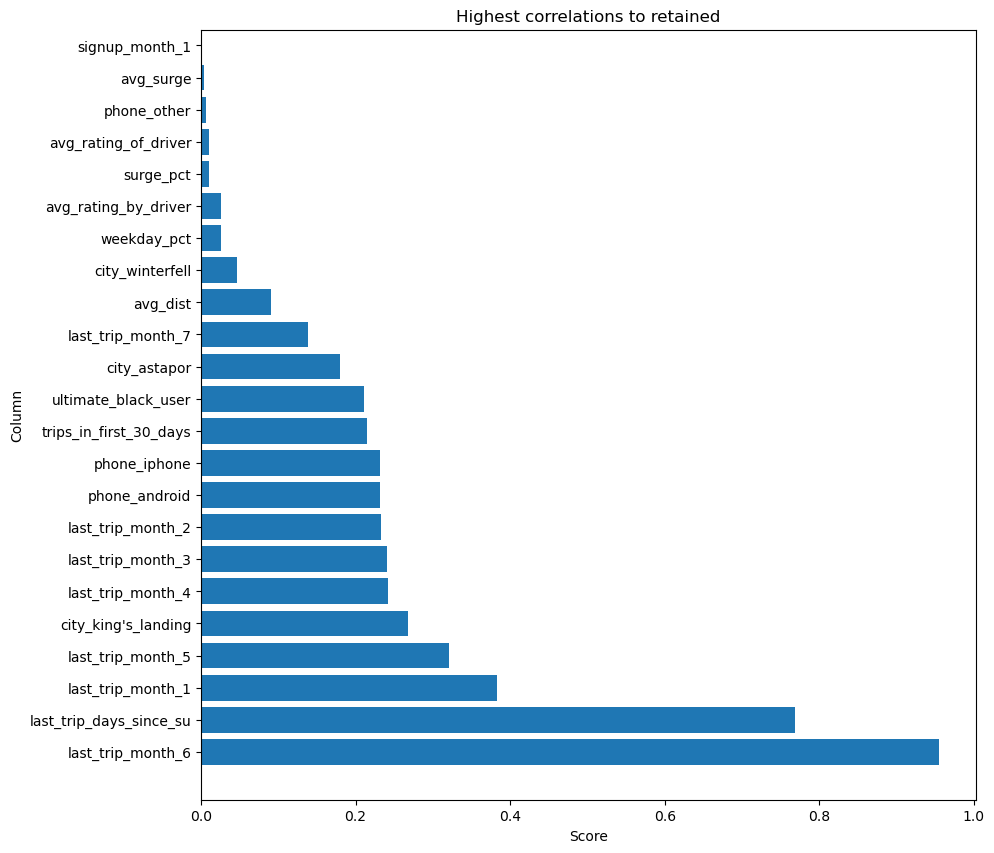

In [52]:
top_correlations, set_correlations = correlate_to_target(df_encoded, 'retained', 30)
plot_correlations(top_correlations['corr'], top_correlations['y'], 'Highest correlations to retained')


#### XGBoost Feature Importance

Feeding this data to XGBoost or any tree model does not look any better than the correlation matrix.
xgboost's XGBRegressor() also picks out the <font color=orange>last_trip_days_since_su</font> as the highest correlation

The rest of the features get scores in the 25% range.  While they may correlate better than some other features, I don't believe they are individually predictive

In [53]:
y = df_encoded[['retained']]
X = df_encoded.loc[:, df_encoded.columns != 'retained']

In [54]:

top_features, set_features = calc_feature_importance(X, y, top_n=30)


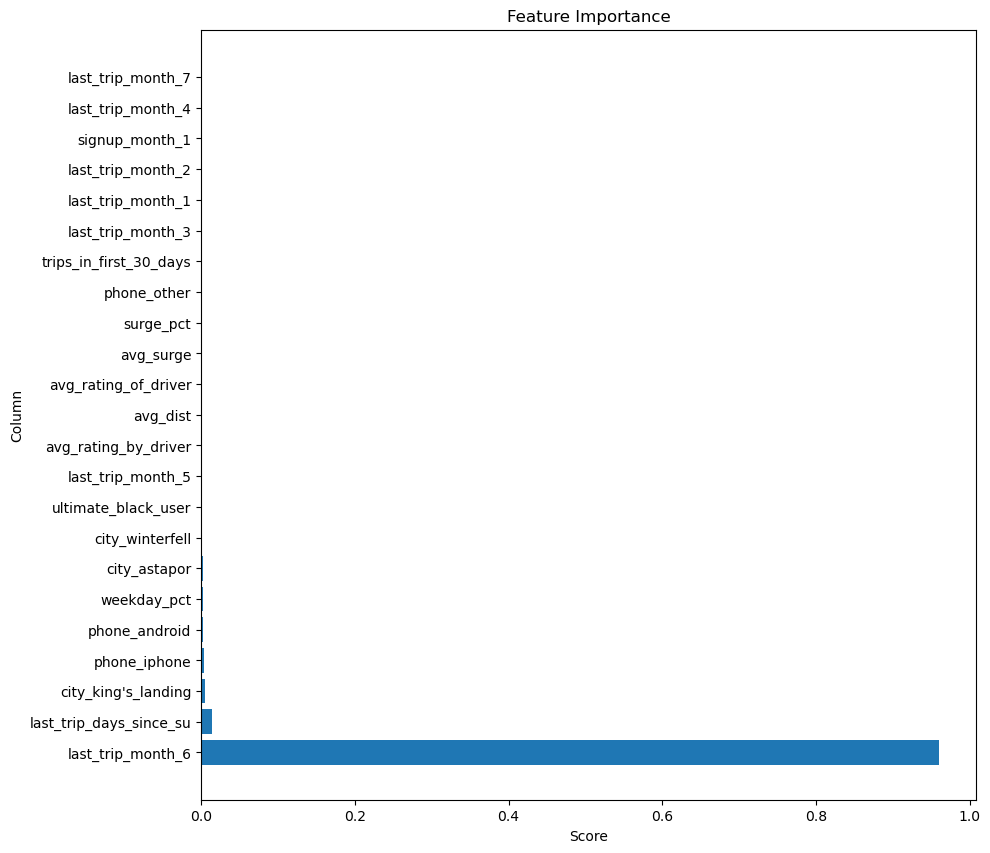

In [55]:
plot_correlations(
    top_features['corr'],
    top_features['y'], "Feature Importance")

#### XGBoost Feature without 'last_trip_month' features
I added the <font color=orange>last_trip_days_since_su</font>, and based on that I would say that length of membership could be more important than any of the given features...maybe...

But let's remove the <font color=orange>last_trip_days_since_su</font> feature and see where we stand.


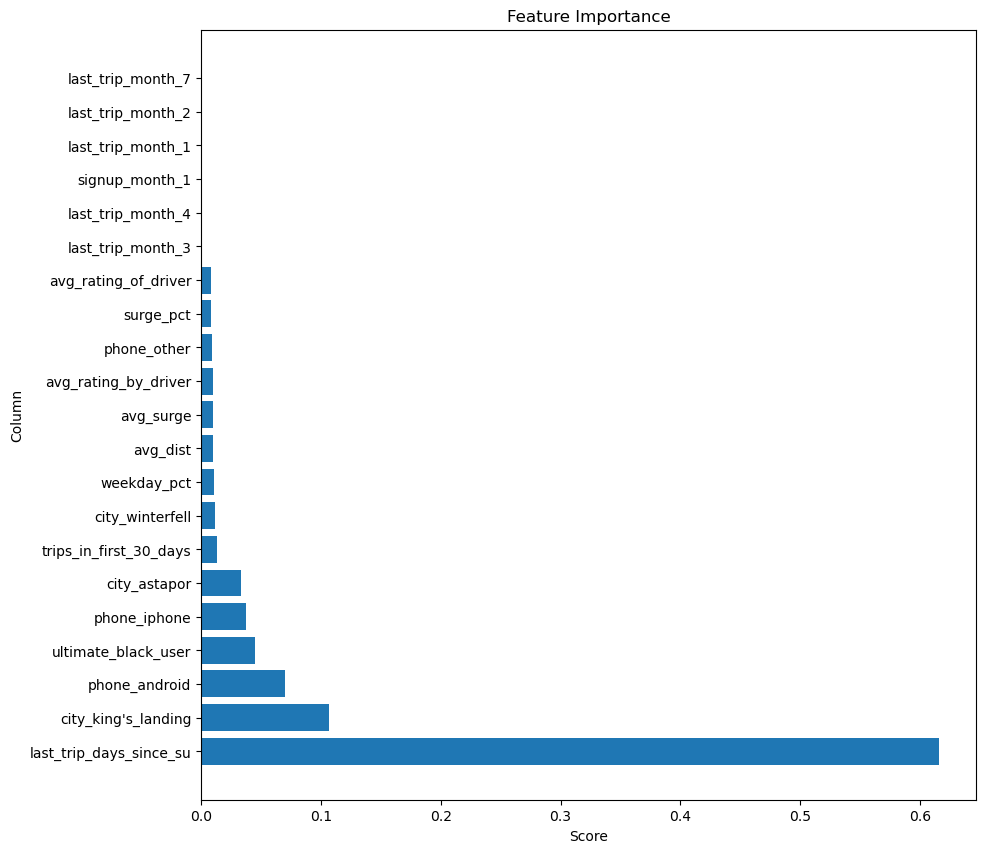

In [56]:
OriginalX = X.drop(columns=['last_trip_month_6', 'last_trip_month_5'])
top_features, set_features = calc_feature_importance(OriginalX, y, top_n=30)
plot_correlations(
    top_features['corr'],
    top_features['y'], "Feature Importance")


<div style="background-color: teal; padding: 10px;">
    <h3 style="color: white;">Save and Retreat</h3>
</div>


With this combination, the city of kings landing and the average rating by driver look better. but I'm skeptical that they have any predictive power.
We certainly can't say definitively either way though.

So we can end this phase by saving the X and y datasets and use them to actually predict in an ML model


In [57]:
import os

if not os.path.exists("./data"):
    os.makedirs("./data")

X.to_parquet("data/ultimate_features.parquet", engine='fastparquet', compression='snappy')
y.to_parquet("data/ultimate_target.parquet", engine='fastparquet', compression='snappy')